Learning Activations in Neural Networks

In [1]:
import numpy as np

In [3]:
def ada_act(x, K):
    return K[0] + K[1] * x

In [5]:
def ada_act_derivative(x, K):
    return K[1] 

In [7]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [9]:
def forward(X, w1, b1, w2, b2, w3, b3, K):
    z1 = np.dot(X, w1) + b1
    a1 = ada_act(z1, K)
    z2 = np.dot(a1, w2) + b2
    a2 = ada_act(z2, K)
    z3 = np.dot(a2, w3) + b3
    a3 = softmax(z3)
    return a3, a1, a2, z1, z2

In [11]:
def compute_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

In [13]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [15]:
def update_parameters(X, y, a1, a2, z1, z2, a3, w1, b1, w2, b2, w3, b3, K, learning_rate):
    dz3 = a3 - y
    dw3 = np.dot(a2.T, dz3) / X.shape[0]
    db3 = np.mean(dz3, axis=0, keepdims=True)

    da2 = np.dot(dz3, w3.T)
    dz2 = da2 * ada_act_derivative(z2, K)
    dw2 = np.dot(a1.T, dz2) / X.shape[0]
    db2 = np.mean(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * ada_act_derivative(z1, K)
    dw1 = np.dot(X.T, dz1) / X.shape[0]
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # Update weights and biases
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    
    # Update activation function parameters
    K -= learning_rate * np.array([
        np.mean(dw1),
        np.mean(dw2),
        np.mean(dw3)
    ]).reshape(-1, 1)

    return w1, b1, w2, b2, w3, b3, K

In [17]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [88]:
np.random.seed(42)
X_train = np.random.rand(1000, 3)
y_train = np.random.randint(0, 3, size=(1000,))
y_train = np.eye(3)[y_train]  
X_test = np.random.rand(10, 3)
y_test = np.random.randint(0, 3, size=(10,))
y_test = np.eye(3)[y_test] 

In [140]:
input_size = 3
hidden_size1 = 5
hidden_size2 = 3
output_size = 3
learning_rate = 0.01
epochs = 1000

In [120]:
w1 = np.random.randn(input_size, hidden_size1) * 0.01
b1 = np.zeros((1, hidden_size1))
w2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
b2 = np.zeros((1, hidden_size2))
w3 = np.random.randn(hidden_size2, output_size) * 0.01
b3 = np.zeros((1, output_size))
K = np.random.randn(3, 1) * 0.1 

In [122]:
b1

array([[0., 0., 0., 0., 0.]])

In [124]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
f1_scores = []

In [126]:
from sklearn.metrics import f1_score

In [150]:
for epoch in range(epochs):
    output, a1, a2, z1, z2 = forward(X_train, w1, b1, w2, b2, w3, b3, K)
        
    train_loss = compute_loss(y_train, output)
    train_accuracy = accuracy(y_train, output)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    w1, b1, w2, b2, w3, b3, K = update_parameters(X_train, y_train, a1, a2, z1, z2, output, w1, b1, w2, b2, w3, b2, K, learning_rate)

    test_output, _, _, _, _ = forward(X_test, w1, b1, w2, b2, w3, b3, K)
    test_loss = compute_loss(y_test, test_output)
    test_accuracy = accuracy(y_test, test_output)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_output, axis=1), average='weighted')
    f1_scores.append(f1)
    learning_rate = learning_rate * 0.5
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
                f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}, F1 Score: {f1:.4f}')



Epoch 0, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 100, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 200, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 300, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 400, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 500, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 600, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 700, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 800, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.0977, Test Acc: 0.6000, F1 Score: 0.4500
Epoch 900, Train Loss: 1.0986, Train Acc: 0.3410, Test Loss: 1.097

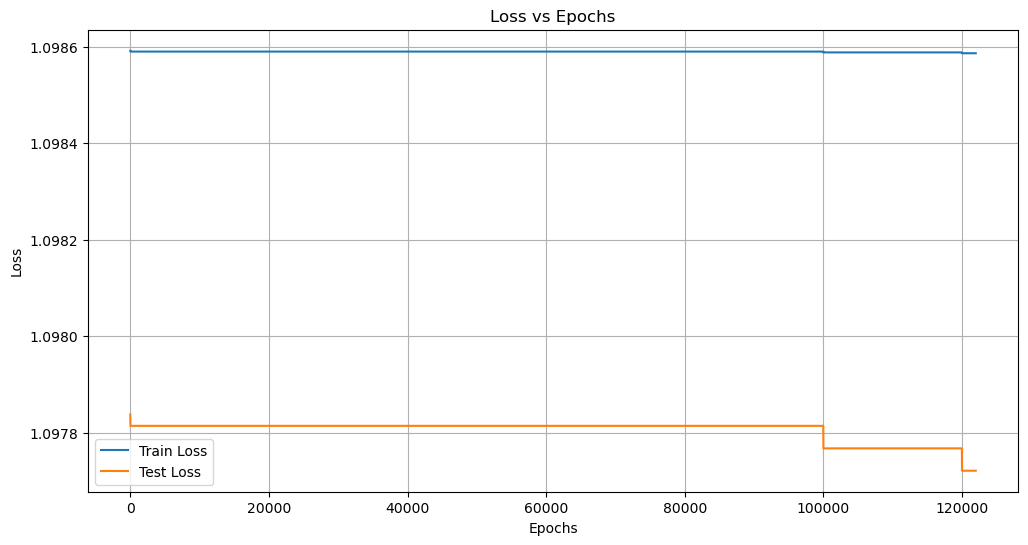

Final Parameters: k0=-0.0822, k1=0.1188, k2=0.1536


In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

print(f'Final Parameters: k0={K[0][0]:.4f}, k1={K[1][0]:.4f}, k2={K[2][0]:.4f}')

In [146]:
test_accuracy

0.6

In [156]:
f1

0.45